<a href="https://colab.research.google.com/github/pearlbop08/Vegetable-fruit-detection/blob/main/vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!unzip /content/drive/Othercomputers/My Laptop/Downloads/Fruits_Vegetables.zip

unzip:  cannot find or open /content/drive/Othercomputers/My, /content/drive/Othercomputers/My.zip or /content/drive/Othercomputers/My.ZIP.


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip "/content/drive/Othercomputers/My Laptop/Downloads/Fruits_Vegetables.zip" -d /content/


Archive:  /content/drive/Othercomputers/My Laptop/Downloads/Fruits_Vegetables.zip
   creating: /content/Fruits_Vegetables/test/
   creating: /content/Fruits_Vegetables/test/apple/
  inflating: /content/Fruits_Vegetables/test/apple/Image_1.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_10.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_2.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_3.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_4.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_5.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_6.JPG  
  inflating: /content/Fruits_Vegetables/test/apple/Image_7.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_8.jpg  
  inflating: /content/Fruits_Vegetables/test/apple/Image_9.jpg  
   creating: /content/Fruits_Vegetables/test/banana/
  inflating: /content/Fruits_Vegetables/test/banana/Image_1.jpg  
  inflating: /content/Fruits_Vegetables/test/banan

In [24]:
data_train_path = '/content/Fruits_Vegetables/train'
data_test_path = '/content/Fruits_Vegetables/test'
data_val_path = '/content/Fruits_Vegetables/validation'

In [25]:
img_width = 180
img_height = 180

In [26]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split =False
)

Found 3115 files belonging to 36 classes.


In [27]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [28]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split =False
)

Found 351 files belonging to 36 classes.


In [29]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split =False
)

Found 359 files belonging to 36 classes.


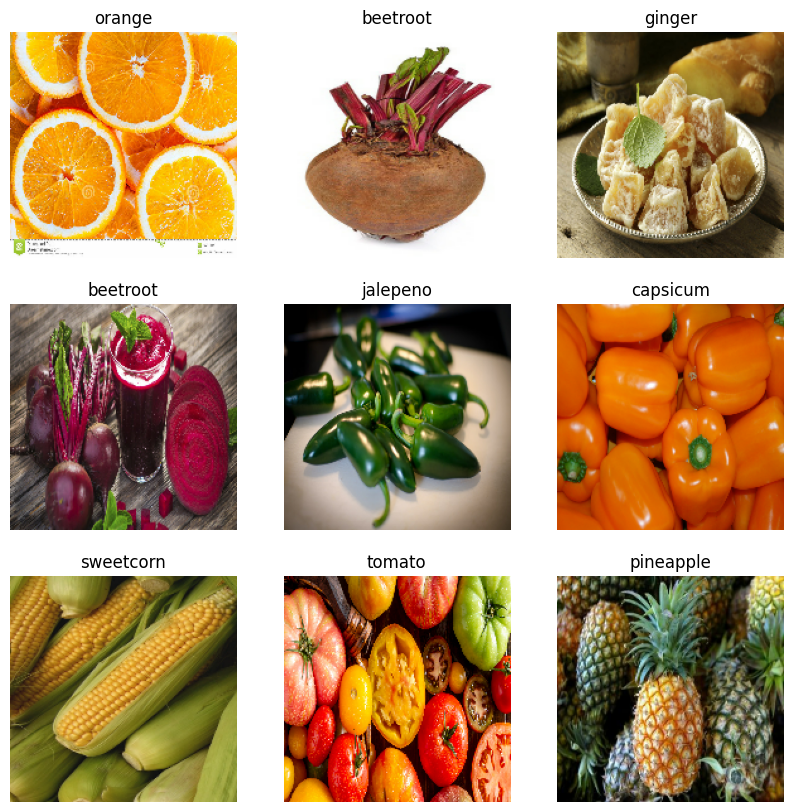

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data_train.class_names[labels[i]])
    plt.axis("off")

In [32]:
model = Sequential([
    layers.Rescaling(1./255),# normalizing the images into 0 to 1
    layers.Conv2D(16, 3, padding='same', activation='relu'),# 16 filters, 3x3 size
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_train.class_names))])

In [33]:
model.compile(optimizer ='adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
history=model.fit(data_train, validation_data=data_val, epochs=10 , batch_size=32)

Epoch 1/10
98/98 [==============================] - 69s 655ms/step - loss: 2.2057 - accuracy: 0.3535 - val_loss: 1.4485 - val_accuracy: 0.6125
Epoch 2/10
98/98 [==============================] - 70s 660ms/step - loss: 1.6774 - accuracy: 0.5075 - val_loss: 1.1915 - val_accuracy: 0.6553
Epoch 3/10
98/98 [==============================] - 71s 671ms/step - loss: 1.1014 - accuracy: 0.6822 - val_loss: 0.5837 - val_accuracy: 0.8689
Epoch 4/10
98/98 [==============================] - 70s 665ms/step - loss: 0.6952 - accuracy: 0.7994 - val_loss: 0.4709 - val_accuracy: 0.8889
Epoch 5/10
98/98 [==============================] - 71s 673ms/step - loss: 0.4187 - accuracy: 0.8809 - val_loss: 0.4102 - val_accuracy: 0.9060
Epoch 6/10
98/98 [==============================] - 70s 651ms/step - loss: 0.2440 - accuracy: 0.9352 - val_loss: 0.2912 - val_accuracy: 0.9345
Epoch 7/10
98/98 [==============================] - 72s 660ms/step - loss: 0.1565 - accuracy: 0.9631 - val_loss: 0.2893 - val_accuracy: 0.9430

Text(0.5, 1.0, 'Training and Validation Accuracy')

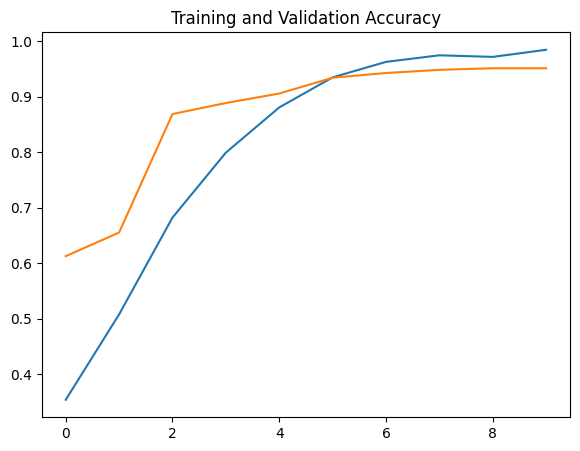

In [39]:
epochs_range = range(10)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')



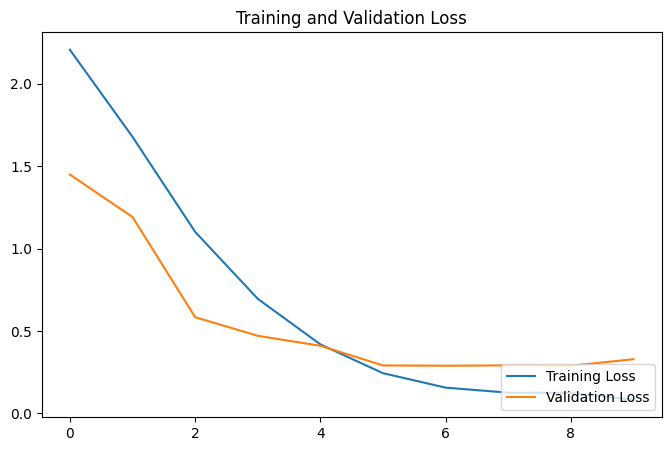

In [42]:

plt.figure(figsize=(8,5))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show();

In [57]:
image = 'chilli.jpg'
image = tf.keras.utils.load_img(
    image, target_size=(img_height, img_width)
)
image = tf.keras.utils.img_to_array(image)
image = np.expand_dims(image, axis=0)

In [58]:
predict = model.predict(image)

1/1 [==============================] - 0s 20ms/step


In [59]:
score = tf.nn.softmax(predict[0])

In [60]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(data_train.class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tomato with a 94.71 percent confidence.


In [61]:
model.save('Image_classify.keras')